In [57]:
# Import Python Library 
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Clear Data from Tom

In [58]:
pwd

'C:\\Users\\Vu\\Canaria\\Analyse Data from the experiment'

In [59]:
# Clean data of Ameer
TOM_31_3 = pd.read_csv("5_gamer_exp\\TOM\\2018-03-31_TOM.csv")
TOM_1_4 = pd.read_csv("5_gamer_exp\\TOM\\2018-04-01_TOM.csv")

In [68]:
TOM_31_3['Quality'] = 'signal'
TOM_31_3.head()

,Date,Patient_ID,Red_Signal,Quality
0,12:54:44.096662,TOM,686,signal
1,12:54:44.100672,TOM,656,signal
2,12:54:44.100672,TOM,526,signal
3,12:54:44.101674,TOM,422,signal
4,12:54:44.102676,TOM,327,signal


In [294]:
TOM_31_3.head(100,2000)

TypeError: head() takes from 1 to 2 positional arguments but 3 were given

In [61]:
# Check uncorrect data from the data file
i = 0
for data in TOM_31_3.Red_Signal:
    try:
        float(data) # Try to convert each data points
        i = i + 1
    except ValueError:
        print(i)  # Print the error line

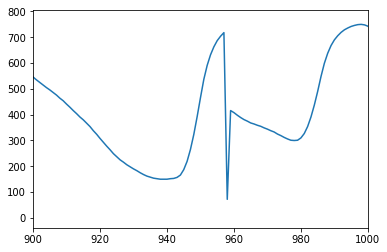

In [67]:
# Plot and analyse signal
#plt.ylim(15000, 24000)
plt.xlim([900, 1000])
plt.plot(TOM_31_3.Red_Signal) #draw the plot object
plt.show() #display the plot object

In [273]:
# Label noise signal
TOM_31_3['Quality'].iloc[20975: 21550] = 'noise'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [274]:
def extract_index_signal(signal, type_sig):
    sig_index = []
    for index, value in enumerate(signal):
        if value == type_sig:
            sig_index.append(index)
    return sig_index

In [275]:
def extract_value_signal(signal, index):
    sig_value = []
    for i in index:
        sig_value.append(signal[i])
    return sig_value

In [276]:
index_noise = extract_index_signal(TOM_31_3['Quality'], 'noise')
value_noise = extract_value_signal(TOM_31_3['Red_Signal'], index_noise)

In [277]:
index_signal = extract_index_signal(TOM_31_3['Quality'], 'signal')
value_signal = extract_value_signal(TOM_31_3['Red_Signal'], index_signal)

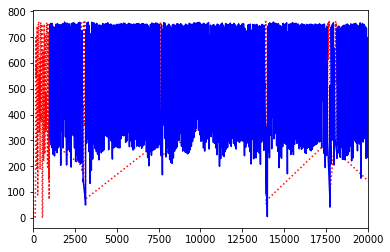

In [295]:
plt.xlim([0, 20000])
plt.plot(index_noise, value_noise, ':r', label='sin(x)')
plt.plot(index_signal, value_signal, '-b', label='cos(x)')
plt.show()